<h1 style="text-align:center;">Etape 1: Exploration de données(EDA) </h1>

L'Exploration de Données (EDA), également connue sous le nom de Data Exploration en anglais, est une phase cruciale dans le processus d'analyse de données. Elle consiste à examiner, résumer et visualiser les données pour mieux comprendre leur nature, leur structure, leurs modèles et leurs caractéristiques.

L'EDA est généralement la première étape entreprise par les analystes de données et les scientifiques des données avant de construire des modèles d'apprentissage automatique ou de prendre des décisions basées sur les données.

# Data Description  

Ce projet a pour objectif de mettre en place un système de prédiction des prix de voitures d'occasion en utilisant des critères spécifiques tels que la marque, la transmission, le type de carburant, le nombre d'anciens propriétaires, l'année de fabrication, et bien d'autres. Pour ce faire, nous utilisons des techniques de Machine Learning.

Notre approche consiste à développer un algorithme de Machine Learning capable de prendre en compte ces critères pour estimer de manière précise le prix d'une voiture d'occasion. Cette solution permettra aux utilisateurs d'obtenir une estimation fiable du prix d'une voiture d'occasion en se basant sur des informations clés, facilitant ainsi le processus d'achat ou de vente de véhicules d'occasion.

Le Machine Learning joue un rôle central dans ce projet en nous permettant d'exploiter les données existantes pour créer un modèle prédictif robuste. Grâce à l'analyse des données et à l'entraînement du modèle, nous pourrons fournir des prédictions de prix précises et personnalisées en fonction des caractéristiques spécifiques de chaque véhicule.

voici la signification des noms des colonnes :

    * feature name: Le nom de chaque colonne ou caractéristique dans l'ensemble de données.

    * year: L'année de fabrication ou de mise en circulation du véhicule.

    * selling_price: Le prix de vente du véhicule.

    * km_driven: Le nombre de kilomètres parcourus par le véhicule.

    * fuel: Le type de carburant utilisé par le véhicule (par exemple, essence, diesel, électrique, etc.).

    *  seller_type: Le type de vendeur (par exemple, vendeur individuel, concessionnaire, etc.).

    * transmission: Le type de transmission du véhicule (par exemple, manuelle, automatique).

    * owner: Le nombre de propriétaires précédents du véhicule.

    * mileage: La consommation de carburant du véhicule en termes de kilomètres par litre.

    * engine: La cylindrée du moteur du véhicule.

    * max_power: La puissance maximale du moteur du véhicule.

    * torque: Le couple du moteur du véhicule.

    * seats: Le nombre de places (sièges) dans le véhicule.
    
Les données originales proviennent de Vehicle dataset sur Kaggle URL: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?fbclid=IwAR1mCHhtXoBV8PZESSd6621bkUp7hTrrvmTid6VzgcAuTZJqtgw-zECtAXw


# 1. Importation des packages

In [1]:
import pandas as pd  # Importe la bibliothèque pandas pour la manipulation de données sous forme de dataframes.
import numpy as np   # Importe la bibliothèque numpy pour la manipulation de tableaux (arrays).

import matplotlib.pyplot as plt  # Importe la bibliothèque matplotlib pour la visualisation de données.
import seaborn as sns  # Importe la bibliothèque seaborn pour la visualisation de données basée sur matplotlib.

# 2. charger des données

In [2]:
data=pd.read_csv('Car.csv') # lire

# 3. Visualisation de données

In [3]:
data.head() #Affichage des premières lignes des données

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Utilisation de la méthode .shape pour obtenir les dimensions du dataframe Dimensions des données (nombre de lignes et de colonnes
dimensions = data.shape

# Affichage des dimensions
print(dimensions)


(8128, 13)


In [5]:
data.info() #Informations sur les données :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           7787 non-null   float64
 2   selling_price  7787 non-null   float64
 3   km_driven      7787 non-null   float64
 4   fuel           7787 non-null   object 
 5   seller_type    7787 non-null   object 
 6   transmission   7787 non-null   object 
 7   owner          7787 non-null   object 
 8   mileage        7566 non-null   object 
 9   engine         7566 non-null   object 
 10  max_power      7572 non-null   object 
 11  torque         7565 non-null   object 
 12  seats          7566 non-null   float64
dtypes: float64(4), object(9)
memory usage: 825.6+ KB


In [6]:
data.describe()

,year,selling_price,km_driven,seats
count,7787.000000,7.787000e+03,7.787000e+03,7566.000000
mean,2014.054193,6.566975e+05,6.840663e+04,5.422284
std,3.911379,8.174188e+05,5.663441e+04,0.955162
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.750000e+05,3.300150e+04,5.000000
50%,2015.000000,4.599990e+05,6.000000e+04,5.000000
75%,2017.000000,6.965000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
data.describe(include=object)
#obtenir des statistiques descriptives spécifiques aux colonnes de type objet (chaînes de caractères)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,7787,7787,7787,7787,7566,7566,7572,7565
unique,2236,4,3,2,5,381,117,305,376
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4245,6437,6750,5199,225,1017,377,530


In [8]:
data['seller_type'].value_counts()
 # Comptage des valeurs

Individual          6437
Dealer              1114
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [9]:
data.isna().sum()

name               0
year             341
selling_price    341
km_driven        341
fuel             341
seller_type      341
transmission     341
owner            341
mileage          562
engine           562
max_power        556
torque           563
seats            562
dtype: int64

<Axes: >

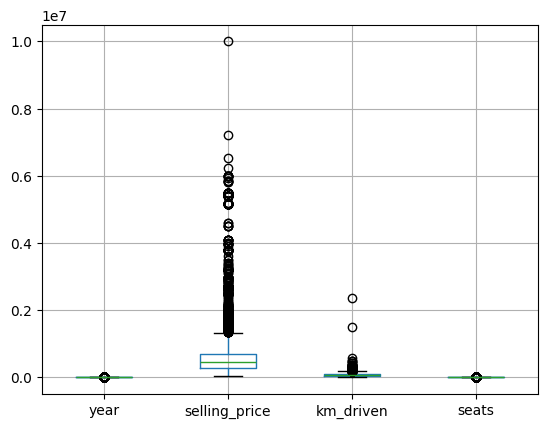

In [10]:
data.boxplot()

### Matrice de coleration

La matrice de corrélation indique les valeurs de corrélation, qui mesurent le degré de relation linéaire entre chaque paire de variables.

In [11]:
import seaborn as sns

numeric_data = data.select_dtypes(include=['number'])
# matrice de correlation
correlation_matrix = numeric_data.corr()
#Diagramme de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<Axes: >

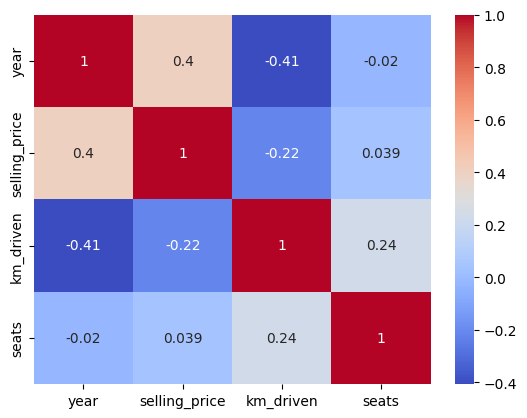

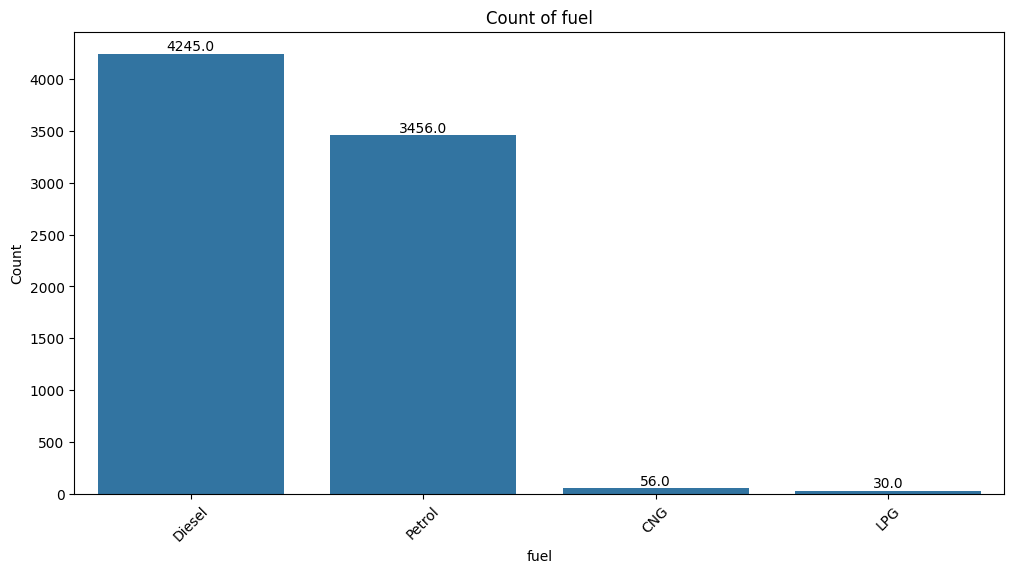

In [12]:
import matplotlib.pyplot as plt  # Importe la bibliothèque matplotlib pour la création de graphiques.
import seaborn as sns            # Importe la bibliothèque seaborn pour une visualisation améliorée.

def custom_bar_plot(data, col, figsize=(15, 7), rotation=0):

    plt.figure(figsize=figsize)  # Crée une nouvelle figure avec la taille spécifiée.

    # Crée un graphique à barres (countplot) en utilisant la colonne spécifiée et l'ordre des catégories.
    plot = sns.countplot(x=col, data=data, order=data[col].value_counts().index)

    plt.xticks(rotation=rotation)  # Fait pivoter les étiquettes sur l'axe des x (si rotation est non nul).

    # Ajoute des étiquettes au-dessus de chaque barre pour afficher le nombre de chaque catégorie.
    for p in plot.patches:
        plot.annotate(f'{p.get_height()}',
                      (p.get_x() + p.get_width() / 2.0, p.get_height()),
                      ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    plt.xlabel(col)   # Définit le label de l'axe des x avec le nom de la colonne.
    plt.ylabel('Count')  # Définit le label de l'axe des y comme "Count".
    plt.title(f'Count of {col}')  # Définit le titre du graphique en fonction de la colonne spécifiée.
    plt.show()  # Affiche le graphique.

# Exemple d'utilisation
custom_bar_plot(data, 'fuel', figsize=(12, 6), rotation=45)  # Appelle la fonction .


In [13]:
data['fuel'].hist()

<Axes: >

In [14]:
import pygwalker as pyg
walker = pyg.walk(
    data,
    spec="./chart_meta_0.json",    # this json file will save your chart state, you need to click save button in ui mannual when you finish a chart, 'autosave' will be supported in the future.
    use_kernel_calc=True,          # set `use_kernel_calc=True`, pygwalker will use duckdb as computing engine, it support you explore bigger dataset(<=100GB).
)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

<h2 style="text-align:right;">Passer à l'étape 2 ...</h2>